### Задача 3 Многоклассовая классификация и множественная классификация/регрессия

**Автор**: Степырев Даниил Федорович

**Группа**: 22.М05

**Выполненные задачи**:
- [] Изучите [возможности sklearn](https://scikit-learn.org/stable/modules/multiclass.html#multiclass-classification) для решения задач **Multiclass classification**, **Multilabel classification** и **Multioutput Regression**. Основные компоненты библиотеки указаны на рисунке ниже.
![multi_org_chart](https://scikit-learn.org/stable/_images/multi_org_chart.png)

- [] Найдите данные, на которых можно решить задачу **Multiclass classification** (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.
- [] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.
- [] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [] Используя стратегии **OneVsRest**, **OneVsOne** и **OutputCode** решите задачу **Multiclass classification** для каждого из пройденных базового алгоритма классификации (**logistic regression, svm, knn, naive bayes, decision tree**). При обучении использовать **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания.
- [] Замерить время обучения каждой модели для каждой стратегии.
- [] Для оценки качества моделей используйте метрику **AUC-ROC**.
- [] Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.
- [ ] (**+3 балла**) Повторить все пункты для задачи **Multilabel classification** (классификация с несколькими целевыми признаками, например, бинарными). В качестве стратегий попробовать **MultiOutputClassifier** и **ClassifierChain**.
- [ ] (**+2 балла**) Повторить все пункты для задачи **Multioutput Regression** (регрессия с несколькими целевыми признаками, вещественными). Модель попробовать как минимум одну: **Ridge**. В качестве стратегий попробовать **MultiOutputRegressor** и **RegressorChain**. В качестве метрики использовать **R2**.

### Данные, на которых решается задача

В задаче используется датасет, содержащий информацию о физических возможностях людей разных возрастов.

Описание датасета:

- **age** --- возраст;

- **gender** --- пол;

- **height_cm** --- рост в сантиметрах;

- **weight_kg** --- вес в килограммах;

- **body fat_%** --- процент жира;

- **diastolic** --- минимальное значение диастоллического кровяного давления;

- **systolic** --- минимальное значение систолического кровяного давления;

- **gripForce** --- вис;

- **sit and bend forward_cm** --- максимальный наклон вперед в сантиметрах;

- **sit-ups counts** --- количество приседаний;

- **broad jump_cm** --- прыжок в длину в сантимаетрах;

- **class** --- класс (A --- наилучший).

Целевой признак --- **class**.

### Считывание данных

Подключаем использумые библиотеки:

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

Считыванием обучающую выборку:

In [2]:
df = pd.read_csv('Dataset/body_performance.csv')
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


Общее количество пропущенных значений:

In [3]:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

### Разведочный анализ (EDA)

Рассмотрим, сколько значений принимает целевой признак:

In [4]:
df['class'].value_counts()

C    3349
D    3349
A    3348
B    3347
Name: class, dtype: int64

Построим график:

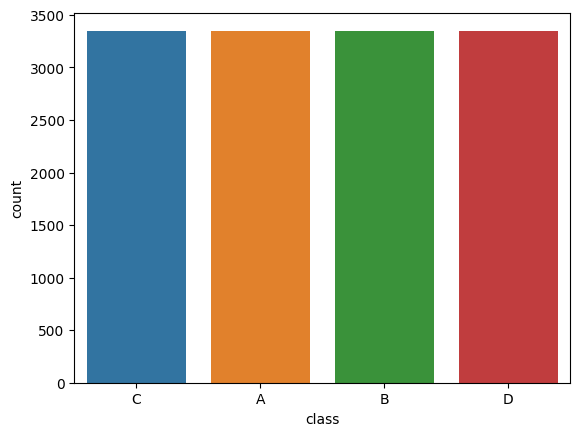

In [5]:
sns.countplot(x="class", data=df)
plt.show()

Видим, что в датасете почти равное число всех классов.

#### Количественный признак age

Выясним, какие значения принимает признак **age** в датасете:

In [6]:
df['age'].describe()

count    13393.000000
mean        36.775106
std         13.625639
min         21.000000
25%         25.000000
50%         32.000000
75%         48.000000
max         64.000000
Name: age, dtype: float64

Видим, что в датасете люди в возрасте от 21 до 64 лет, средний возраст --- 37 лет.

Введём дополнительную функцию для удобного отображения графиков:

In [7]:
def show_class_crosstab(x_param, x_param_name = "", figsize_number = 20):
    pd.crosstab(df[x_param], df['class']).plot(kind="bar", figsize=(figsize_number, 6))
    plt.xlabel(x_param_name)
    plt.ylabel('Число людей в классе')
    plt.show()

In [8]:
def show_barplot(x_param_name):
    plt.figure(figsize=(20,5))
    plt.grid(axis="x")
    plt.xticks(rotation = 90)
    plt.title('Принадлежность к классу относительно ' + x_param_name, fontsize = 20)
    plt.xlabel(x_param_name, fontsize= 15)
    plt.ylabel('class', fontsize= 15)
    sns.barplot(x = df[x_param_name], y = df['class'])
    plt.show()

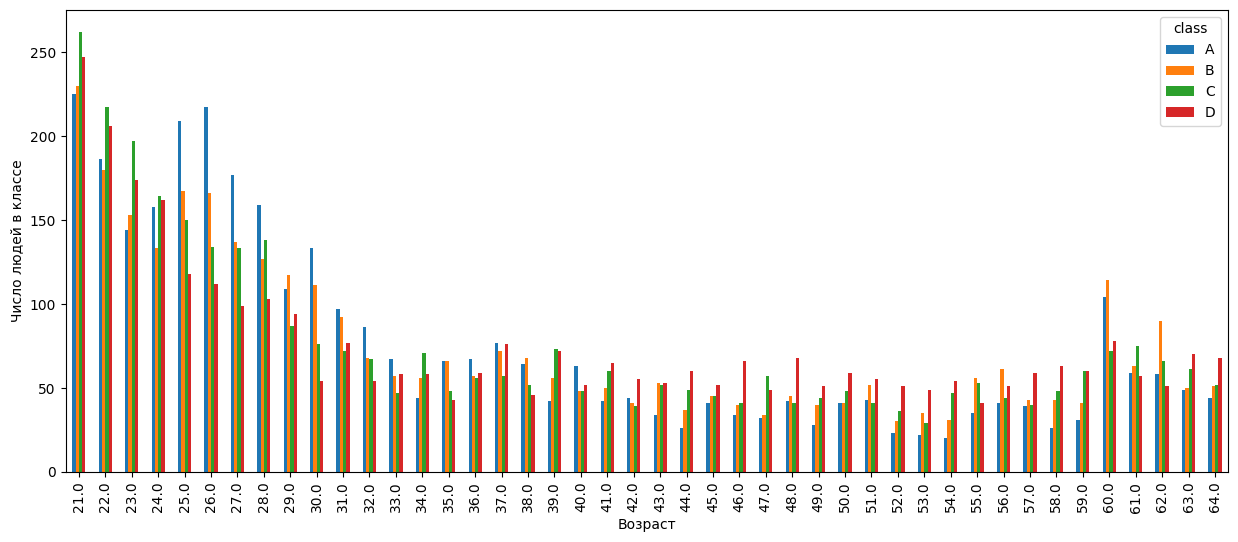

In [9]:
show_class_crosstab('age', 'Возраст', 15)

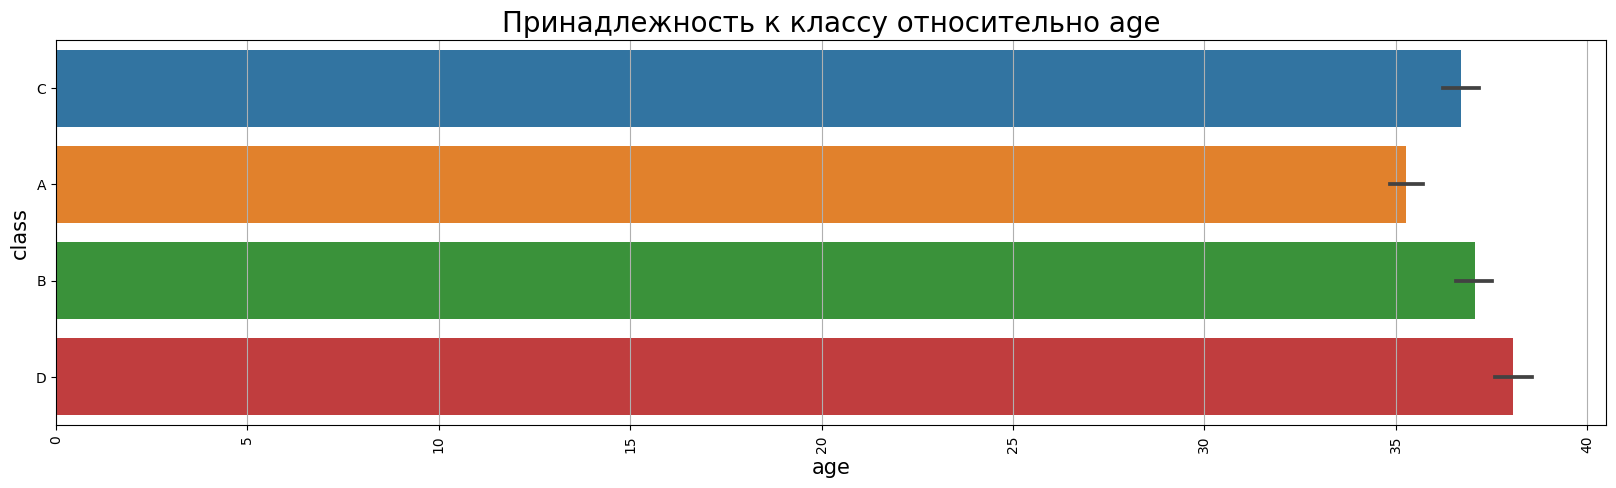

In [10]:
show_barplot('age')

Видим, что в ранних возрастах преобладают классы A и C, в пожилых --- классы B и D. С увеличением возраста видим тенденцию перехода от классов A и B к классам C и D.

Посмотрим, какой средний возраст у людей в разных классах:

In [11]:
df.groupby('class').mean()['age']

class
A    35.268220
B    37.074096
C    36.699612
D    38.058226
Name: age, dtype: float64

В классе A средний возраст ниже, чем у остальных классов и равен 35 лет. В классах B и C средний возрарст равен 37, в классе D --- 38.

### Дискретный признак gender

Выясним, какие значения принимает признак **gender** в датасете:

In [12]:
df['gender'].describe()

count     13393
unique        2
top           M
freq       8467
Name: gender, dtype: object

Видим, что этот признак принимает два значения: F (женщина) и M (мужчина). Число мужчин в датасете больше, чем число женщин.

Построим график:

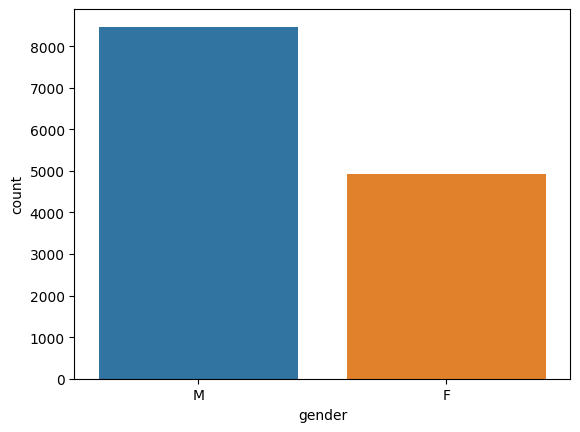

In [13]:
sns.countplot(x="gender", data=df)
plt.show()

Построим график принадлежности к классу относительно пола:

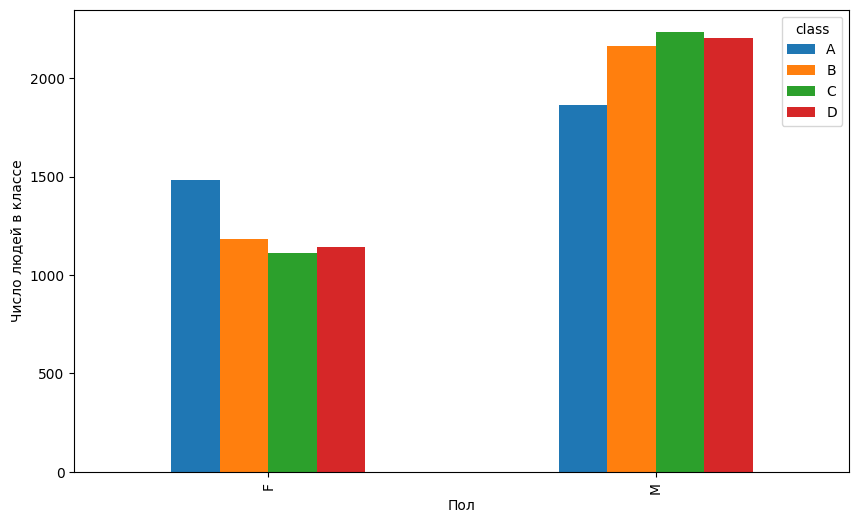

In [14]:
show_class_crosstab('gender', 'Пол', 10)

Видим, что среди женщин преобладает класс A, среди мужчин --- класс C.

Посмотрим, сколько в среднем людей разного пола, относятся к каждому классу:

In [15]:
df.groupby('class')['gender'].value_counts()

class  gender
A      M         1864
       F         1484
B      M         2162
       F         1185
C      M         2237
       F         1112
D      M         2204
       F         1145
Name: gender, dtype: int64

#### Признак height_cm

Выясним, какие значения принимает признак **height_cm** в датасете:

In [16]:
df['height_cm'].describe()

count    13393.000000
mean       168.559807
std          8.426583
min        125.000000
25%        162.400000
50%        169.200000
75%        174.800000
max        193.800000
Name: height_cm, dtype: float64

Видим, что в датасете люди ростом от 125.0 до 193.8 сантиметров.

Построим график принадлежности к классу относительно роста:

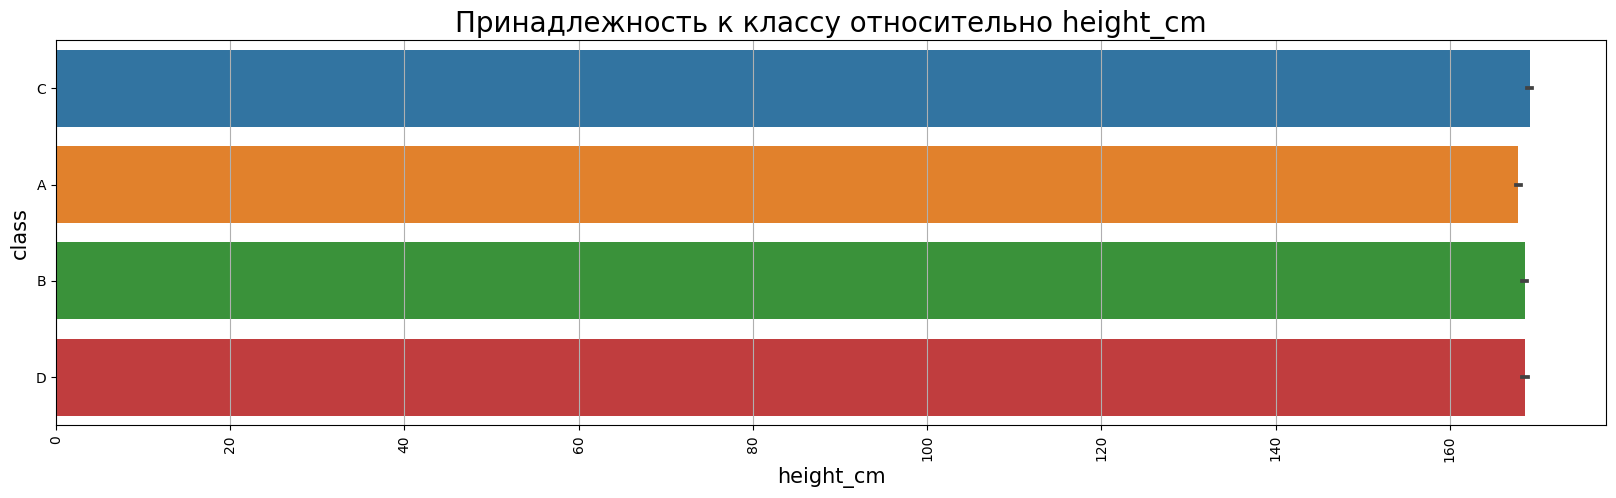

In [17]:
show_barplot('height_cm')

Из графика видим, что люди с меньшим ростом преобладают в классе А, а с большим --- в классе C.

Выясним средние значения роста в каждом классе:

In [18]:
df.groupby('class').mean()['height_cm']

class
A    167.871027
B    168.580311
C    169.162168
D    168.625530
Name: height_cm, dtype: float64

Средний рост людей в классе A 167.8 см, в классе B 168.6 см, в классе C 169.2 см, в классе D 168.6 см.

#### Признак weight_kg

Выясним, какие значения принимает признак **weight_kg** в датасете:

In [19]:
df['weight_kg'].describe()

count    13393.000000
mean        67.447316
std         11.949666
min         26.300000
25%         58.200000
50%         67.400000
75%         75.300000
max        138.100000
Name: weight_kg, dtype: float64

Видим, что в датасете люди весом от 26.3 до 138.1 килограммов. Средний вес человека --- 67 килограммов.

Построим график принадлежности к классу относительно веса:

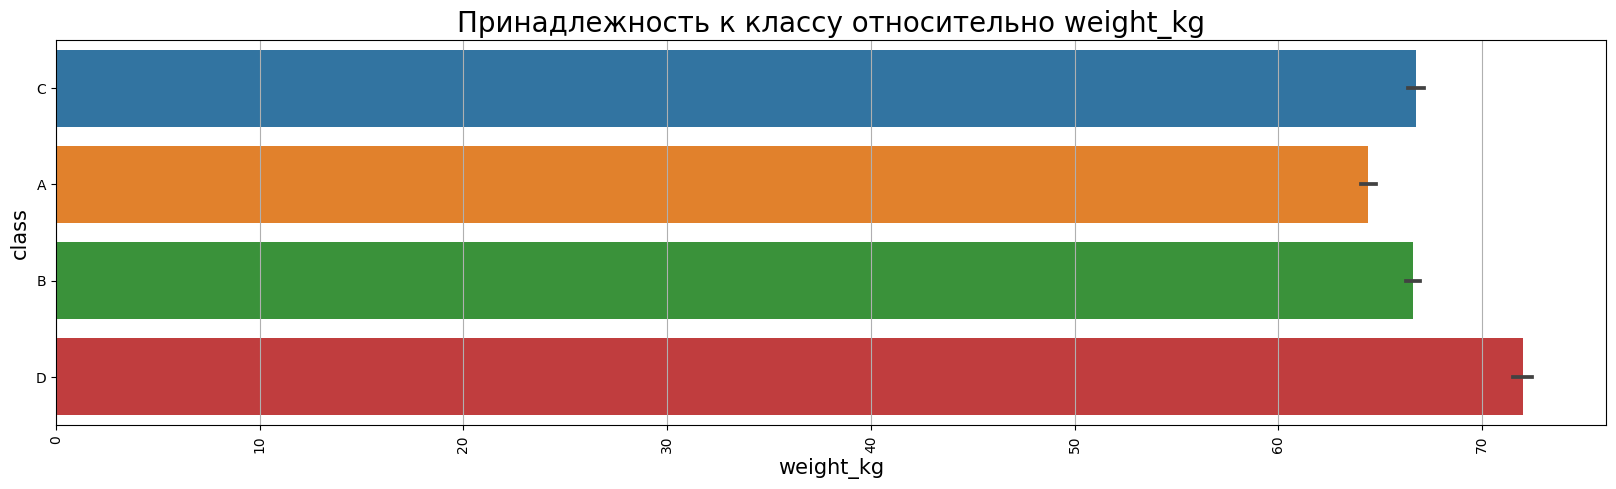

In [20]:
show_barplot('weight_kg')

Из графика видим, что вес людей в классе A значительно меньше, чем в остальных классах. Самый большой средний вес --- в классе D. С увеличением веса ухудшается спортивный класс.

Выясним средние значения веса в каждом классе:

In [21]:
df.groupby('class').mean()['weight_kg']

class
A    64.418178
B    66.612420
C    66.760314
D    71.996948
Name: weight_kg, dtype: float64

Средний вес людей в классе A 64.4 кг, в классе B 66.6 кг, в классе C 66.8 кг, в классе D 71.9 кг.

#### Признак body fat_%

Выясним, какие значения принимает признак **body fat_%** в датасете:

In [22]:
df['body fat_%'].describe()

count    13393.000000
mean        23.240165
std          7.256844
min          3.000000
25%         18.000000
50%         22.800000
75%         28.000000
max         78.400000
Name: body fat_%, dtype: float64

Видим, что в датасете люди с процентом жира от 3.0 до 78.4. Средний процент жира человека --- 23.2.

Построим график принадлежности к классу относительно процента жира:

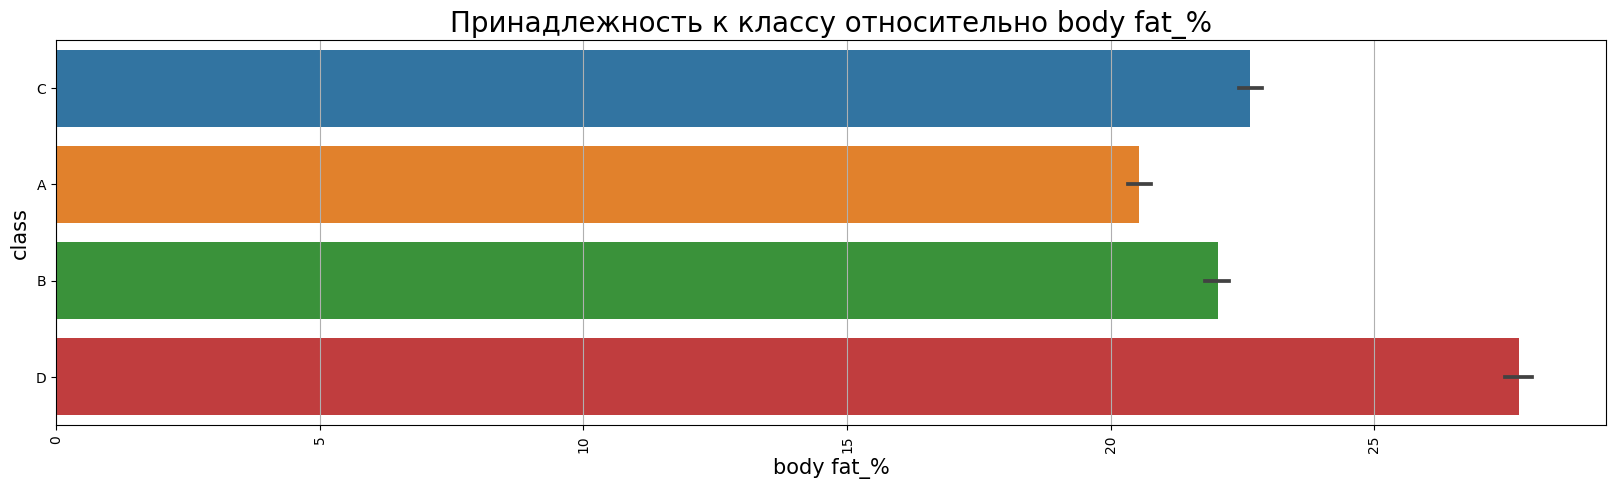

In [23]:
show_barplot('body fat_%')

Из графика видим, что процент жира людей в классе A значительно меньше, чем в остальных классах. Самый большой процент жира --- в классе D. С увеличением процент жира ухудшается спортивный класс.

Выясним средние значения процент жира в каждом классе:

In [24]:
df.groupby('class').mean()['body fat_%']

class
A    20.539159
B    22.039981
C    22.644564
D    27.735432
Name: body fat_%, dtype: float64

Средний процент жира людей в классе A 20.5, в классе B 22.0, в классе C 22.6, в классе D 27.7.

#### Признак diastolic

Выясним, какие значения принимает признак **diastolic** в датасете:

In [25]:
df['diastolic'].describe()

count    13393.000000
mean        78.796842
std         10.742033
min          0.000000
25%         71.000000
50%         79.000000
75%         86.000000
max        156.200000
Name: diastolic, dtype: float64

Видим, что в датасете люди с минимальным дистоллическим кровяным давлением от 0.0 до 156.2. Среднее значение минимального дистоллического кровяного давления человека --- 78.8.

Построим график принадлежности к классу относительно минимального дистоллического кровяного давлени:

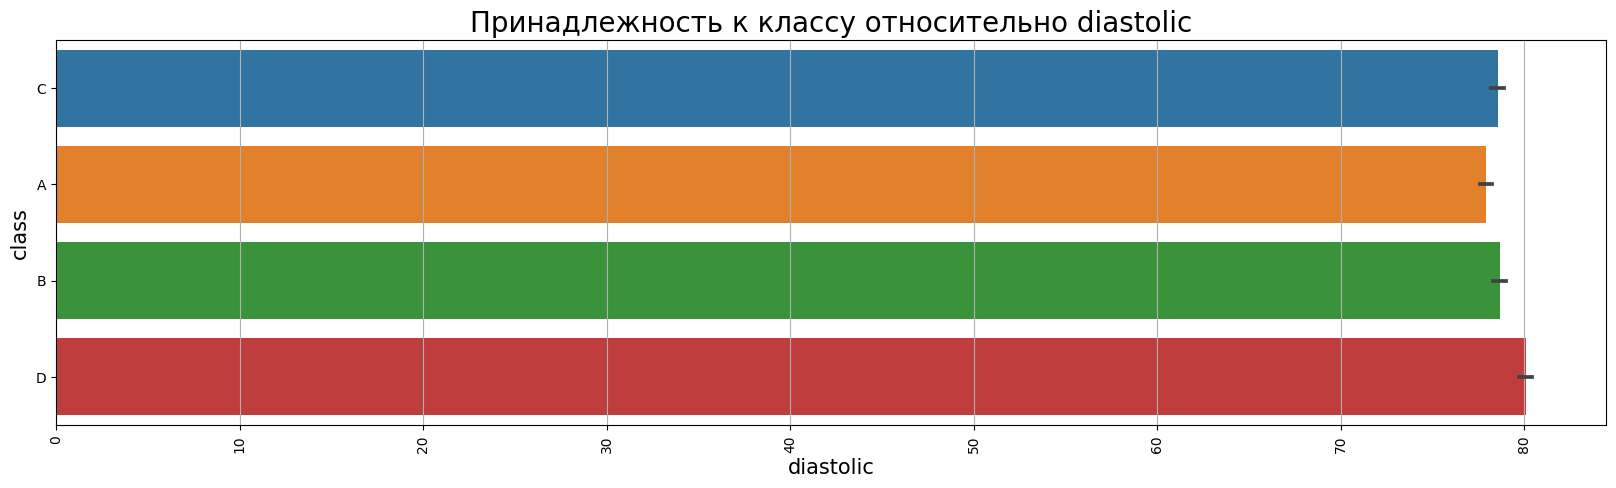

In [26]:
show_barplot('diastolic')

Из графика видим, что минимальное дистоллическое кровяное давление ниже всего в классе А. В классе D оно имеет самое высокое значение. Видим тенденцию ухудшения класса с возрастанием минимального дистоллического кровяного давления.

Выясним среднее значение минимального дистоллического кровяного давления в каждом классе:

In [27]:
df.groupby('class').mean()['diastolic']

class
A    77.903345
B    78.656468
C    78.550672
D    80.076530
Name: diastolic, dtype: float64

Среднее минимальное значение дистоллического кровяного давления людей в классе A 77.9, в классе B 78.6, в классе C 78.5, в классе D 80.1.

#### Признак systolic

Выясним, какие значения принимает признак **systolic** в датасете:

In [28]:
df['systolic'].describe()

count    13393.000000
mean       130.234817
std         14.713954
min          0.000000
25%        120.000000
50%        130.000000
75%        141.000000
max        201.000000
Name: systolic, dtype: float64

Видим, что в датасете люди с минимальным систолическим кровяным давлением от 0.0 до 201.0. Среднее значение минимального систолического кровяного давления человека --- 130.2.

Построим график принадлежности к классу относительно минимального систолического кровяного давления:

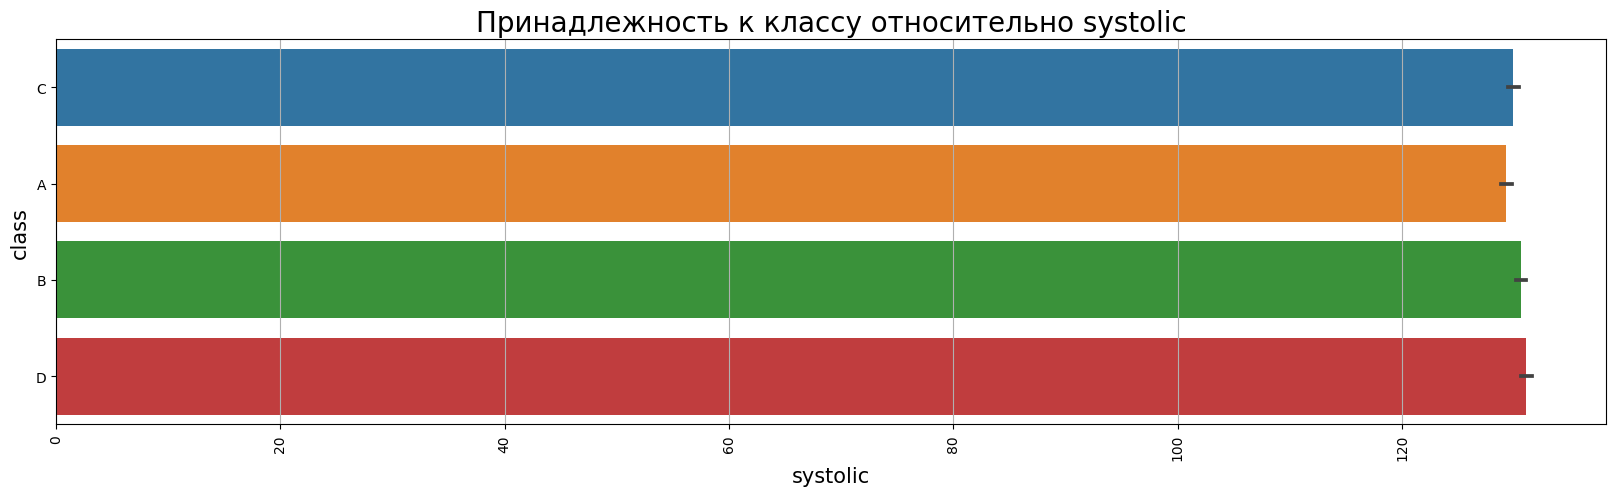

In [29]:
show_barplot('systolic')

Из графика видим, что минимальное дистоллическое кровяное давление ниже всего в классе А. В классе D оно имеет самое высокое значение. Видим тенденцию ухудшения класса с возрастанием минимального систолического кровяного давления.

Выясним среднее значение минимального систолического кровяного давления в каждом классе:

In [30]:
df.groupby('class').mean()['systolic']

class
A    129.290024
B    130.639349
C    129.925351
D    131.084503
Name: systolic, dtype: float64

Среднее минимальное значение систолического кровяного давления людей в классе A 129.3, в классе B 130.6, в классе C 129.9, в классе D 131.1.

#### Признак gripForce

Выясним, какие значения принимает признак **gripForce** в датасете:

In [31]:
df['gripForce'].describe()

count    13393.000000
mean        36.963877
std         10.624864
min          0.000000
25%         27.500000
50%         37.900000
75%         45.200000
max         70.500000
Name: gripForce, dtype: float64

Видим, что в датасете признак **gripForce** имеет значения от 0.0 до 70.5. Среднее значение --- 36.9.

Построим график принадлежности к классу относительно **gripForce**:

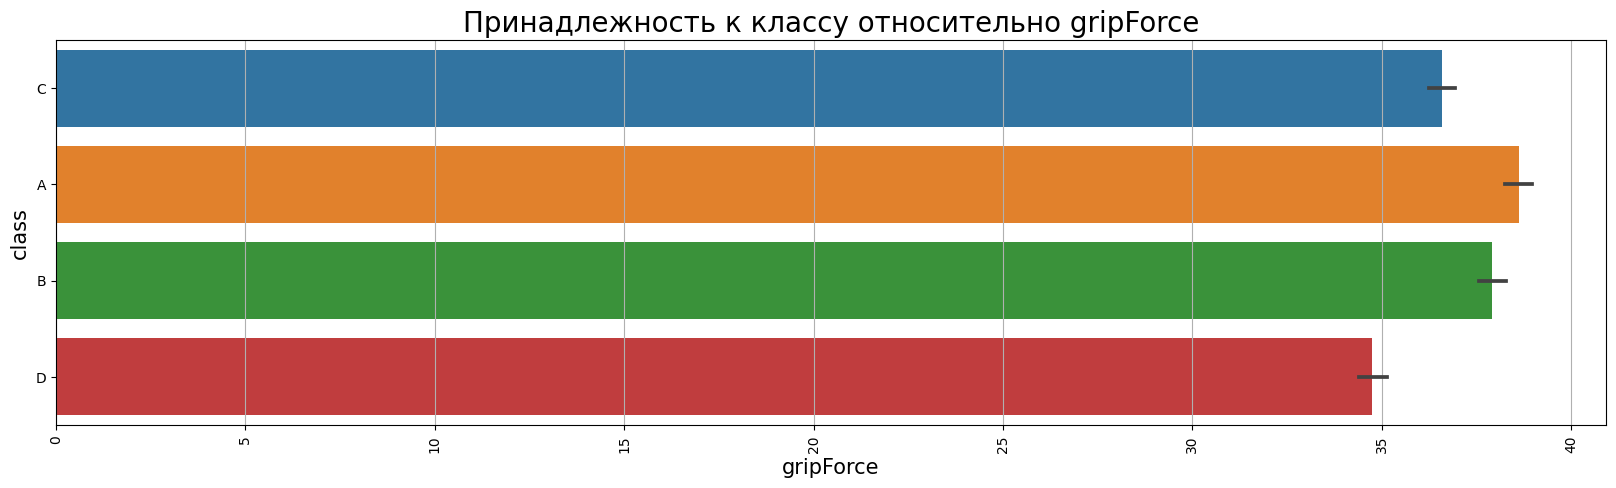

In [32]:
show_barplot('gripForce')

Из графика видим, что значение **gripForce** ниже всего в классе D. В классе A оно имеет самое высокое значение. Видим тенденцию улучшения класса с возрастанием **gripForce**.

Выясним среднее значение **gripForce** в каждом классе:

In [33]:
df.groupby('class').mean()['gripForce']

class
A    38.615723
B    37.910436
C    36.582663
D    34.747746
Name: gripForce, dtype: float64

Среднее значение **gripForce** в классе A 38.6, в классе B 37.9, в классе C 36.6, в классе D 34.7.

#### Признак sit and bend forward_cm

Выясним, какие значения принимает признак **sit and bend forward_cm** в датасете:

In [34]:
df['sit and bend forward_cm'].describe()

count    13393.000000
mean        15.209268
std          8.456677
min        -25.000000
25%         10.900000
50%         16.200000
75%         20.700000
max        213.000000
Name: sit and bend forward_cm, dtype: float64

Видим, что в датасете люди с максимальным значением наклона вперёд от -25.0 до 213.0. Среднее значение максимального наклона вперёд человека --- 15.2.

Построим график принадлежности к классу относительно маскимального наклона вперед:

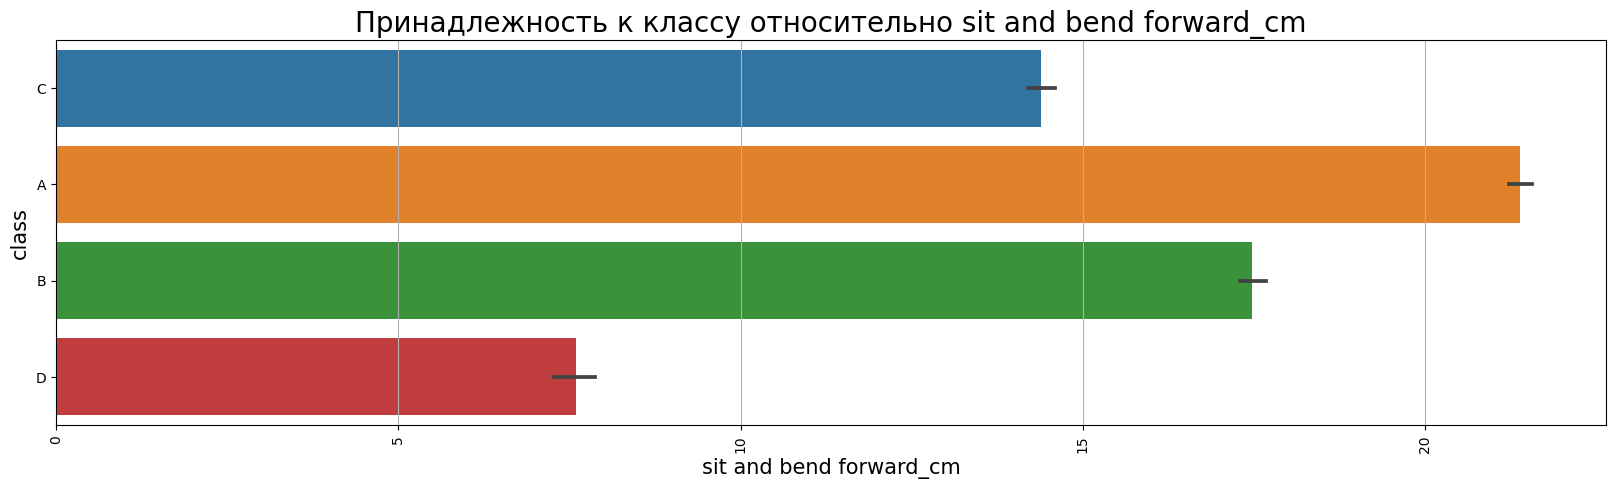

In [35]:
show_barplot('sit and bend forward_cm')

Из графика видим, что значение максимального наклона впереж ниже всего в классе D. В классе A оно имеет самое высокое значение. Видим тенденцию улучшения класса с возрастанием максимального наклона вперед.

Выясним среднее значение максимального наклона вперед в каждом классе:

In [36]:
df.groupby('class').mean()['sit and bend forward_cm']

class
A    21.391777
B    17.467586
C    14.390645
D     7.590260
Name: sit and bend forward_cm, dtype: float64

Среднее значение максимального наклона вперед в классе A 21.4, в классе B 17.5, в классе C 14.4, в классе D 7.6.

#### Признак sit-ups counts

Выясним, какие значения принимает признак **sit-ups counts** в датасете:

In [37]:
df['sit-ups counts'].describe()

count    13393.000000
mean        39.771224
std         14.276698
min          0.000000
25%         30.000000
50%         41.000000
75%         50.000000
max         80.000000
Name: sit-ups counts, dtype: float64

Видим, что в датасете люди с максимальным количеством приседаний от 0.0 до 80.0. Среднее значение максимального количества приседаний человека --- 39.8.

Построим график принадлежности к классу относительно максимального числа приседаний:

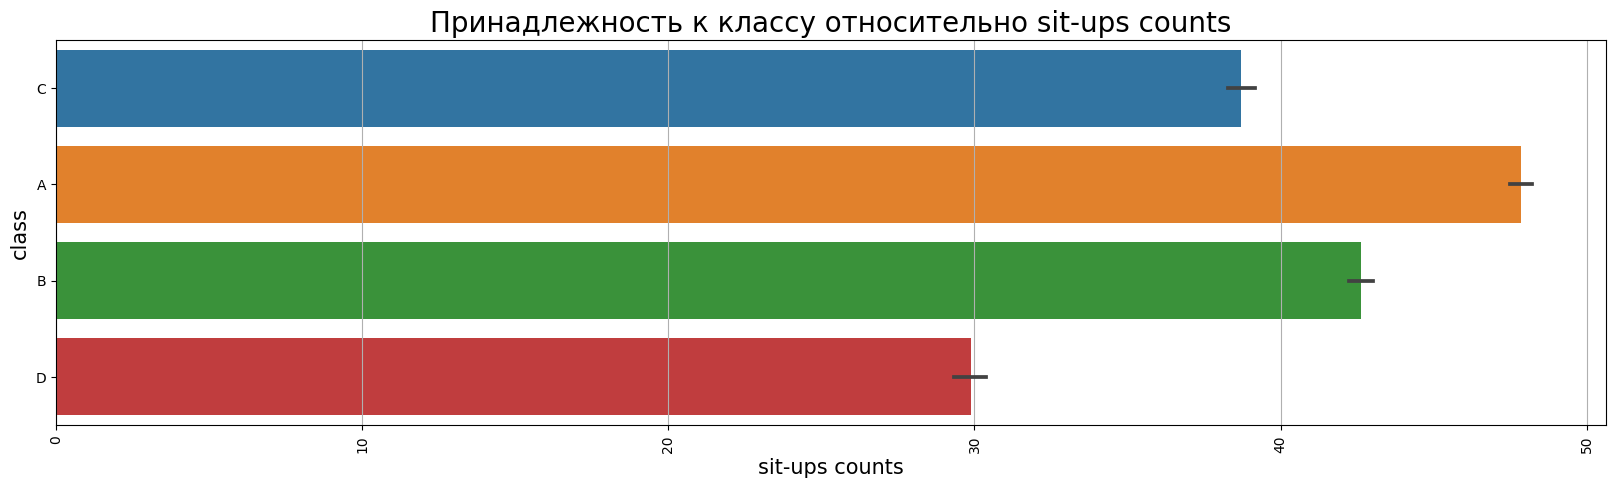

In [38]:
show_barplot('sit-ups counts')

Из графика видим, что значение максимального количества приседаний ниже всего в классе D. В классе A оно имеет самое высокое значение. Видим тенденцию улучшения класса с возрастанием максимального количества приседаний.

Выясним среднее значение максимального количества приседаний в каждом классе:

In [39]:
df.groupby('class').mean()['sit-ups counts']

class
A    47.848268
B    42.639199
C    38.720215
D    29.881338
Name: sit-ups counts, dtype: float64

Среднее значение максимального количества приседаний в классе A 47.8, в классе B 42.6, в классе C 38.7, в классе D 29.9.

#### Признак broad jump_cm

Выясним, какие значения принимает признак **broad jump_cm** в датасете:

In [40]:
df['broad jump_cm'].describe()

count    13393.000000
mean       190.129627
std         39.868000
min          0.000000
25%        162.000000
50%        193.000000
75%        221.000000
max        303.000000
Name: broad jump_cm, dtype: float64

Видим, что в датасете люди с максимальной длиной прыжка от 0.0 до 303.0. Среднее значение максимальной длины прыжка человека --- 190.1.

Построим график принадлежности к классу относительно максимальной длины прыжка:

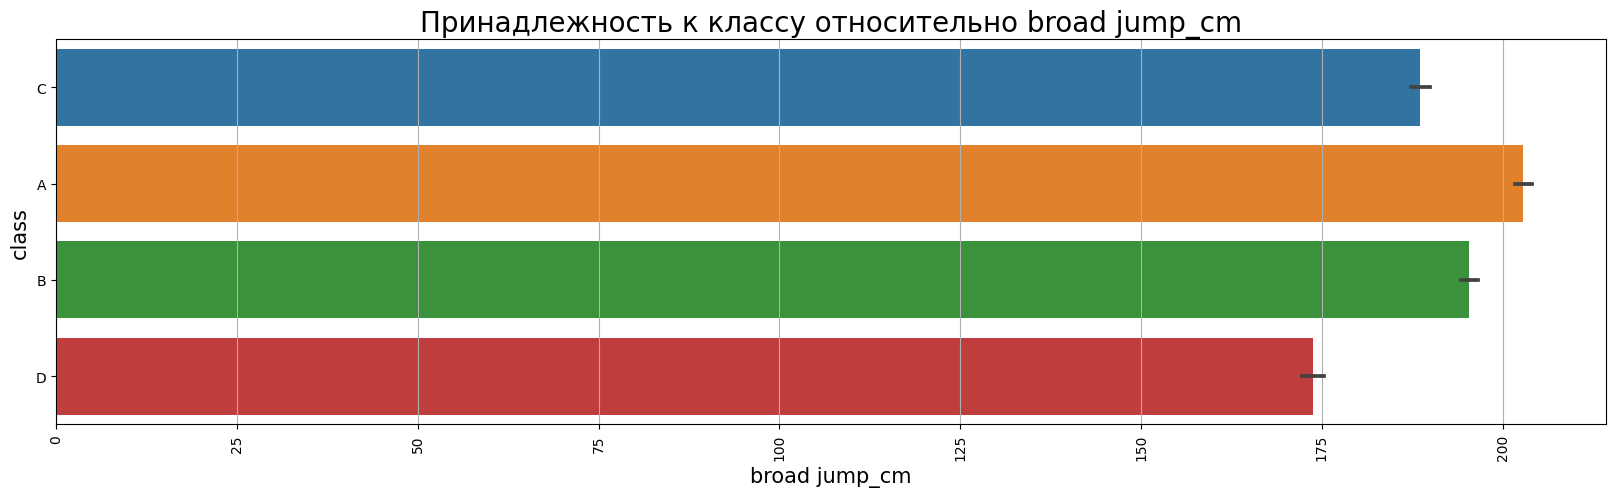

In [41]:
show_barplot('broad jump_cm')

Из графика видим, что значение максимальной длины прыжка ниже всего в классе D. В классе A оно имеет самое высокое значение. Видим тенденцию улучшения класса с возрастанием максимальной длины прыжка.

Выясним среднее значение максимальной длины прыжка в каждом классе:

In [42]:
df.groupby('class').mean()['broad jump_cm']

class
A    202.744026
B    195.332566
C    188.627949
D    173.820842
Name: broad jump_cm, dtype: float64

Среднее значение максимальной длины прыжка в классе A 202.7, в классе B 195.3, в классе C 188.6, в классе D 173.8.

#### Выводы

- **age** --- в ранних возрастах преобладают классы A и C, в пожилых --- классы B и D. С увеличением возраста есть тенденция перехода от классов A и B к классам C и D. В классе A средний возраст равен 35 лет, в классах B и C средний возраст равен 37, в классе D --- 38;

- **gender** --- число мужчин в датасете больше, чем число женщин. Среди женщин преобладает класс A, среди мужчин --- класс C;

- **height_cm** --- люди с меньшим ростом преобладают в классе А, а с большим --- в классе C. Средний рост людей в классе A 167.8 см, в классе B 168.6 см, в классе C 169.2 см, в классе D 168.6 см;

- **weight_kg** --- вес людей в классе A значительно меньше, чем в остальных классах. Самый большой средний вес --- в классе D. С увеличением веса ухудшается спортивный класс. Средний вес людей в классе A 64.4 кг, в классе B 66.6 кг, в классе C 66.8 кг, в классе D 71.9 кг;

- **body fat_%** --- процент жира людей в классе A значительно меньше, чем в остальных классах. Самый большой процент жира --- в классе D. С увеличением процент жира ухудшается спортивный класс. Средний процент жира людей в классе A 20.5, в классе B 22.0, в классе C 22.6, в классе D 27.7;

- **diastolic** --- минимальное дистоллическое кровяное давление ниже всего в классе А. В классе D оно имеет самое высокое значение. Видим тенденцию ухудшения класса с возрастанием минимального дистоллического кровяного давления. Среднее минимальное значение дистоллического кровяного давления людей в классе A 77.9, в классе B 78.6, в классе C 78.5, в классе D 80.1;

- **systolic** --- минимальное дистоллическое кровяное давление ниже всего в классе А. В классе D оно имеет самое высокое значение. Видим тенденцию ухудшения класса с возрастанием минимального систолического кровяного давления. Минимальное значение систолического кровяного давления людей в классе A 129.3, в классе B 130.6, в классе C 129.9, в классе D 131.1;

- **gripForce** --- значение **gripForce** ниже всего в классе D. В классе A оно имеет самое высокое значение. Видим тенденцию улучшения класса с возрастанием **gripForce**. Среднее значение максимального наклона вперед в классе A 21.4, в классе B 17.5, в классе C 14.4, в классе D 7.6;

- **sit and bend forward_cm** --- значение максимального наклона впереж ниже всего в классе D. В классе A оно имеет самое высокое значение. Видим тенденцию улучшения класса с возрастанием максимального наклона вперед. Среднее значение максимального наклона вперед в классе A 21.4, в классе B 17.5, в классе C 14.4, в классе D 7.6;

- **sit-ups counts** --- значение максимального количества приседаний ниже всего в классе D. В классе A оно имеет самое высокое значение. Видим тенденцию улучшения класса с возрастанием максимального количества приседаний. Среднее значение максимального количества приседаний в классе A 47.8, в классе B 42.6, в классе C 38.7, в классе D 29.9;

- **broad jump_cm** --- значение максимальной длины прыжка ниже всего в классе D. В классе A оно имеет самое высокое значение. Видим тенденцию улучшения класса с возрастанием максимальной длины прыжка. Среднее значение максимальной длины прыжка в классе A 202.7, в классе B 195.3, в классе C 188.6, в классе D 173.8.

### Feature Engineering

Преобразуем количественные признаки в категориальные:

### Новый признак категории возраста age

In [43]:
df['age_category'] = pd.qcut(df['age'], 4)
df.groupby(['age_category', 'class'])['class'].count().to_frame().style.background_gradient(cmap='summer_r')

In [44]:
df['age_category'] = 0
df.loc[df['age'] <= 25.0, 'age_category'] = 0
df.loc[(df['age'] > 25.0) & (df['age'] <= 32.0), 'age_category'] = 1
df.loc[(df['age'] > 32.0) & (df['age'] <= 48.0), 'age_category'] = 2
df.loc[df['age'] > 48.0, 'age_category'] = 3

### Новый признак категории height_cm

In [45]:
df['height_category'] = pd.qcut(df['height_cm'], 4)
df.groupby(['height_category', 'class'])['class'].count().to_frame().style.background_gradient(cmap='summer_r')

In [46]:
df['height_category'] = 0
df.loc[df['height_cm'] <= 162.4, 'height_category'] = 0
df.loc[(df['height_cm'] > 162.4) & (df['height_cm'] <= 169.2), 'height_category'] = 1
df.loc[(df['height_cm'] > 169.2) & (df['height_cm'] <= 174.8), 'height_category'] = 2
df.loc[df['height_cm'] > 174.8, 'height_category'] = 3

### Новый признак категории weight_kg

In [47]:
df['weight_category'] = pd.qcut(df['weight_kg'], 4)
df.groupby(['weight_category', 'class'])['class'].count().to_frame().style.background_gradient(cmap='summer_r')

In [48]:
df['weight_category'] = 0
df.loc[df['weight_kg'] <= 162.4, 'weight_category'] = 0
df.loc[(df['weight_kg'] > 162.4) & (df['weight_kg'] <= 169.2), 'weight_category'] = 1
df.loc[(df['weight_kg'] > 169.2) & (df['weight_kg'] <= 174.8), 'weight_category'] = 2
df.loc[df['weight_kg'] > 174.8, 'weight_category'] = 3

### Новый признак категории body fat_%

In [49]:
df['bodyfat_category'] = pd.qcut(df['body fat_%'], 4)
df.groupby(['bodyfat_category', 'class'])['class'].count().to_frame().style.background_gradient(cmap='summer_r')

In [50]:
df['bodyfat_category'] = 0
df.loc[df['body fat_%'] <= 18.0, 'bodyfat_category'] = 0
df.loc[(df['body fat_%'] > 18.0) & (df['body fat_%'] <= 22.8), 'bodyfat_category'] = 1
df.loc[(df['body fat_%'] > 22.8) & (df['body fat_%'] <= 28.0), 'bodyfat_category'] = 2
df.loc[df['body fat_%'] > 28.0, 'bodyfat_category'] = 3

### Новый признак категории diastolic

In [51]:
df['dialistic_category'] = pd.qcut(df['diastolic'], 4)
df.groupby(['dialistic_category', 'class'])['class'].count().to_frame().style.background_gradient(cmap='summer_r')

In [52]:
df['dialistic_category'] = 0
df.loc[df['diastolic'] <= 71.0, 'dialistic_category'] = 0
df.loc[(df['diastolic'] > 71.0) & (df['diastolic'] <= 79.0), 'dialistic_category'] = 1
df.loc[(df['diastolic'] > 79.0) & (df['diastolic'] <= 86.0), 'dialistic_category'] = 2
df.loc[df['diastolic'] > 86.0, 'dialistic_category'] = 3

### Новый признак категории systolic

In [53]:
df['systolic_category'] = pd.qcut(df['systolic'], 4)
df.groupby(['systolic_category', 'class'])['class'].count().to_frame().style.background_gradient(cmap='summer_r')

In [54]:
df['systolic_category'] = 0
df.loc[df['systolic'] <= 120.0, 'systolic_category'] = 0
df.loc[(df['systolic'] > 120.0) & (df['systolic'] <= 130.0), 'systolic_category'] = 1
df.loc[(df['systolic'] > 130.0) & (df['systolic'] <= 141.0), 'systolic_category'] = 2
df.loc[df['systolic'] > 141.0, 'systolic_category'] = 3

### Новый признак категории gripForce

In [55]:
df['gripforce_category'] = pd.qcut(df['gripForce'], 4)
df.groupby(['gripforce_category', 'class'])['class'].count().to_frame().style.background_gradient(cmap='summer_r')

In [56]:
df['gripforce_category'] = 0
df.loc[df['gripForce'] <= 120.0, 'gripforce_category'] = 0
df.loc[(df['gripForce'] > 120.0) & (df['gripForce'] <= 130.0), 'gripforce_category'] = 1
df.loc[(df['gripForce'] > 130.0) & (df['gripForce'] <= 141.0), 'gripforce_category'] = 2
df.loc[df['gripForce'] > 141.0, 'gripforce_category'] = 3

### Новый признак категории sit and bend forward_cm

In [57]:
df['sit_bend_category'] = pd.qcut(df['sit and bend forward_cm'], 4)
df.groupby(['sit_bend_category', 'class'])['class'].count().to_frame().style.background_gradient(cmap='summer_r')

In [58]:
df['sit_bend_category'] = 0
df.loc[df['sit and bend forward_cm'] <= 120.0, 'sit_bend_category'] = 0
df.loc[(df['sit and bend forward_cm'] > 120.0) & (df['sit and bend forward_cm'] <= 130.0), 'sit_bend_category'] = 1
df.loc[(df['sit and bend forward_cm'] > 130.0) & (df['sit and bend forward_cm'] <= 141.0), 'sit_bend_category'] = 2
df.loc[df['sit and bend forward_cm'] > 141.0, 'sit_bend_category'] = 3

### Новый признак категории sit-ups counts

In [59]:
df['sit_ups_category'] = pd.qcut(df['sit-ups counts'], 4)
df.groupby(['sit_ups_category', 'class'])['class'].count().to_frame().style.background_gradient(cmap='summer_r')

In [60]:
df['sit_ups_category'] = 0
df.loc[df['sit-ups counts'] <= 30.0, 'sit_ups_category'] = 0
df.loc[(df['sit-ups counts'] > 30.0) & (df['sit-ups counts'] <= 41.0), 'sit_ups_category'] = 1
df.loc[(df['sit-ups counts'] > 41.0) & (df['sit-ups counts'] <= 50.0), 'sit_ups_category'] = 2
df.loc[df['sit-ups counts'] > 50.0, 'sit_ups_category'] = 3

### Новый признак категории broad jump_cm

In [61]:
df['jump_broad_category'] = pd.qcut(df['broad jump_cm'], 4)
df.groupby(['jump_broad_category', 'class'])['class'].count().to_frame().style.background_gradient(cmap='summer_r')

In [62]:
df['jump_broad_category'] = 0
df.loc[df['broad jump_cm'] <= 162.0, 'jump_broad_category'] = 0
df.loc[(df['broad jump_cm'] > 162.0) & (df['broad jump_cm'] <= 193.0), 'jump_broad_category'] = 1
df.loc[(df['broad jump_cm'] > 193.0) & (df['broad jump_cm'] <= 221.0), 'jump_broad_category'] = 2
df.loc[df['broad jump_cm'] > 221.0, 'jump_broad_category'] = 3

### Закодируем категориальные признаки

Закодируем катогориальные признаки **age_category**, **height_category**, **weight_category**, **bodyfat_category**, **dialistic_category**, **gripforce_category**, **sit_bend_category**, **jump_broad_category**.

Для кодирования признаков воспользуемся OneHotEncoder из библиотеки sklearn. Напишем функцию, которая поможет преобразовывать категориальные признаки:

In [63]:
from sklearn.preprocessing import OneHotEncoder

def encode_categorial(name):
    encoder = OneHotEncoder(handle_unknown='ignore')
    
    # Кодирование признака.
    encoded_df = pd.DataFrame(encoder.fit_transform(df[[name]]).toarray())
    
    # Список названий столбцов.
    column_names = create_column_names(encoded_df, name)
    
    # Переименование столбцов.
    encoded_df.columns = column_names
    
    return encoded_df
    
def create_column_names(encoded_df, prefix):
    column_names = []
    
    for i in range(0, len(encoded_df.columns)):
        column_names.append(prefix + "_" + str(i))
        
    return column_names    

In [64]:
# Список категориальных признаков.
categorial = ['age_category', 'height_category', 'bodyfat_category', 'dialistic_category', 'gripforce_category', 
              'sit_bend_category', 'jump_broad_category']

# Кодируем катогориальные признаки.
encoded_categorial = [encode_categorial(categorial[i]) for i in range(len(categorial))] 

# Добавляем к исходному датафрейму закодированные значения.
for i in range(len(encoded_categorial)):
    df = df.join(encoded_categorial[i])
    
df    

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,...,dialistic_category_1,dialistic_category_2,dialistic_category_3,gripforce_category_0,sit_bend_category_0,sit_bend_category_1,jump_broad_category_0,jump_broad_category_1,jump_broad_category_2,jump_broad_category_3
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [65]:
# Удаляем количественные признаки, которые преобразовали в категориальные.
df.drop(['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 
         'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm'], axis = 1, inplace = True)

# Удаляем категориальные признаки, которые закодировали.
df.drop(categorial, axis = 1, inplace = True)

df

,gender,class,weight_category,systolic_category,sit_ups_category,age_category_0,age_category_1,age_category_2,age_category_3,height_category_0,...,dialistic_category_1,dialistic_category_2,dialistic_category_3,gripforce_category_0,sit_bend_category_0,sit_bend_category_1,jump_broad_category_0,jump_broad_category_1,jump_broad_category_2,jump_broad_category_3
0,M,C,0,1,3,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,M,A,0,1,3,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,M,C,0,3,2,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,M,B,0,3,3,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,M,B,0,1,2,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,M,C,0,2,2,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
13389,M,D,0,1,2,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
13390,M,A,0,2,2,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
13391,F,D,0,1,0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [66]:
df['gender'].replace(['F', 'M'], [0, 1], inplace = True)
df['class'].replace(['A', 'B', 'C', 'D'], [0, 1, 2, 3], inplace = True)